<a href="https://colab.research.google.com/github/matambotinashe/time-series-forecasting/blob/naive-forecasting/2_Naive_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Time Series Forcasting**
- In this notebook will demostrate naive time series forecasting.

## **Libraries**
- In this notebook will use the numpy and matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Time Series**
- We use all the function previously created in the Inro to Time series notebook to generate a seasonal trend time series.

In [ ]:
def plot_series(time, series, format = '-', start = 0, end = None, label = None):
  plt.plot(time[start:end], series[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

In [ ]:
def trend(time, slope = 0):
  return slope * time

In [ ]:
def seasonal_pattern(season_time):
  """Just an arbitray pattern"""
  return np.where(season_time < 0.4, np.cos(season_time *2*np.pi), 1/np.exp(3*season_time))

def seasonality(time, period, amplitude = 1, phase = 0):
  """Repeats the same pattern at each period"""
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

In [ ]:
def white_noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

## Time Series
- Now will generate the time series as done before.

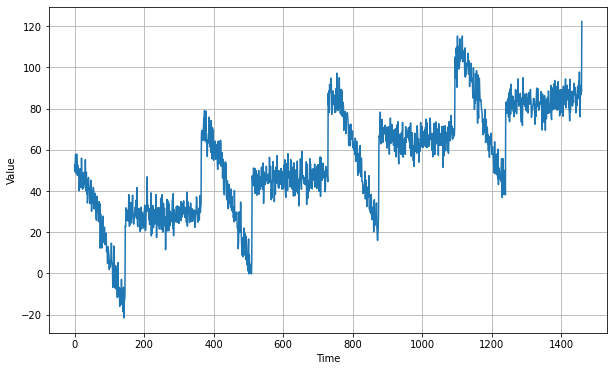

In [ ]:
time = np.arange(4 * 365 + 1)
baseline = 10

amplitude = 40
slope = 0.05

series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)

#white  noise
noise_level = 5
noise = white_noise(time, noise_level, seed = 42)

series += noise

plt.figure(figsize = (10,6))
plot_series(time, series)
plt.show()

## **Forecasting**
- Inorder to forecast, we will split our data into train and test data.
- Will use the first 1000 days as the train data and the rest as the test data.
- Will be using a fixed training window.


In [ ]:
train_cut_off = 1000

train_time = time[:train_cut_off]
test_time = time[train_cut_off:]

train_series = series[:train_cut_off]
test_series = series[train_cut_off:]

### Naive Forecasting.
- For Naive forecasting will be using the value at time "t-1" as the forecast value for value expected at time "t".

In [ ]:
naive_forecast = series[train_cut_off-1:-1]

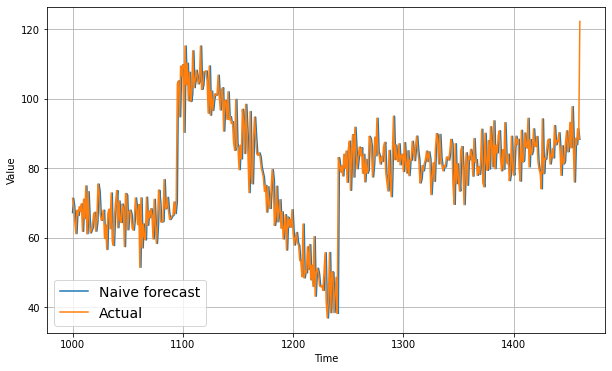

In [ ]:
plt.figure(figsize = (10,6))
plot_series(test_time, naive_forecast, label = 'Naive forecast')
plot_series(test_time, test_series, label = 'Actual')

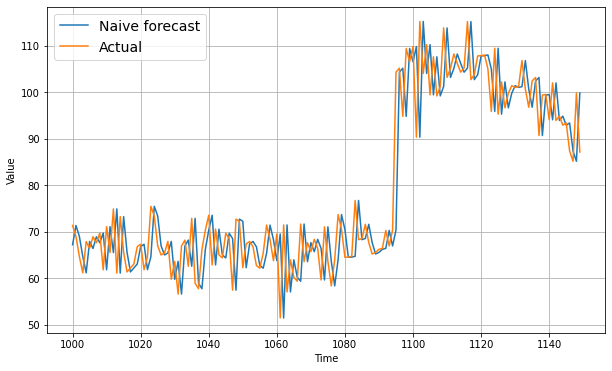

In [ ]:
plt.figure(figsize = (10,6))
plot_series(test_time, naive_forecast, label = 'Naive forecast', end = 150)
plot_series(test_time, test_series, label = 'Actual', end = 150)

## Performance
- For our naive forecasting will use the meant absolute error (MAE) to measure how our forecasting is performing.
- This will form the betchmark to measure future forecasting against other approaches.

In [ ]:
absolute_error = np.abs(naive_forecast - test_series)
mean_absolute_error = absolute_error.mean()
mean_absolute_error

5.9379085153216735